# Plotter
---
- Read weather.csv
- Loop through each station
- Plot temperature
- 3hr - 12hr - 24hr - 48hr - 5 day - 10 day - 30 day - 90 day
---
- Plot wind
- 3hr - 12hr - 24hr - 48hr - 5 day - 10 day - 30 day - 90 day
---

In [334]:
import os
from datetime import date, datetime, timedelta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [335]:
data_path = './data/weather_clean.csv'

# If data exists, load it
# ~~~~~~~~~~~~~~~~~~~~~~~
if os.path.exists(data_path):
    weather_data = pd.read_csv(data_path)
    print(weather_data.head())
else:
    print("No historical data exists")

         Date     Station  Pressure  Height  Temp  DewPoint  \
0  2020-01-01  Quillayute       700  2969.0  -0.9      -0.9   
1  2020-01-01  Quillayute       850  1393.0   6.2       6.2   
2  2020-01-01      Vernon       700  2880.0  -5.5      -7.0   
3  2020-01-01      Vernon       850  1357.0  -3.9      -5.8   
4  2020-01-01  Port Hardy       700  2856.0  -4.3      -5.8   

   Relative_Humidity  Mean_Mixed_Layer  Wind_Direction  Wind_Speed  \
0              100.0              5.14           255.0     100.008   
1              100.0              7.04           260.0      81.488   
2               89.0              3.25           260.0      94.452   
3               87.0              2.93           170.0      18.520   
4               89.0              3.56           250.0      87.044   

   Potential_Temp  Equivalent_Potential_Temp  Virtual_Potential_Temp  
0           301.5                      317.2                   302.4  
1           292.6                      313.1              

In [336]:
weather_data.head()

,Date,Station,Pressure,Height,Temp,DewPoint,Relative_Humidity,Mean_Mixed_Layer,Wind_Direction,Wind_Speed,Potential_Temp,Equivalent_Potential_Temp,Virtual_Potential_Temp
0,2020-01-01,Quillayute,700,2969.0,-0.9,-0.9,100.0,5.14,255.0,100.008,301.5,317.2,302.4
1,2020-01-01,Quillayute,850,1393.0,6.2,6.2,100.0,7.04,260.0,81.488,292.6,313.1,293.9
2,2020-01-01,Vernon,700,2880.0,-5.5,-7.0,89.0,3.25,260.0,94.452,296.4,306.3,296.9
3,2020-01-01,Vernon,850,1357.0,-3.9,-5.8,87.0,2.93,170.0,18.520,282.1,290.5,282.6
4,2020-01-01,Port Hardy,700,2856.0,-4.3,-5.8,89.0,3.56,250.0,87.044,297.7,308.6,298.3


In [337]:
weather_data.set_index(['Date','Station','Pressure'])

Height  Temp  DewPoint  Relative_Humidity  \
Date       Station    Pressure                                              
2020-01-01 Quillayute 700       2969.0  -0.9      -0.9              100.0   
                      850       1393.0   6.2       6.2              100.0   
           Vernon     700       2880.0  -5.5      -7.0               89.0   
                      850       1357.0  -3.9      -5.8               87.0   
           Port Hardy 700       2856.0  -4.3      -5.8               89.0   
...                                ...   ...       ...                ...   
2023-06-28 Vernon     700       3113.0   6.0      -2.0               56.0   
           Port Hardy 700       3106.0   3.2      -7.8               44.0   
           Quillayute 700       3108.0   3.2      -0.2               78.0   
                      850       1498.0  15.0     -14.0               12.0   
           Port Hardy 850       1505.0  12.4       5.4               62.0   

                                Mean_Mixed_Layer  Wind_Direction  Wind_Speed  \
Date       Station    Pressure                                                 
2020-01-01 Quillayute 700                   5.14           255.0     100.008   
                      850                   7.04           260.0      81.488   
           Vernon     700                   3.25           260.0      94.452   
                      850                   2.93           170.0      18.520   
           Port Hardy 700                   3.56           250.0      87.044   
...                                          ...             ...         ...   
2023-06-28 Vernon     700                   4.74            60.0      14.816   
           Port Hardy 700                   3.05           225.0      11.112   
           Quillayute 700                   5.42            60.0       9.260   
                      850                   1.53           310.0       9.260   
           Port Hardy 850                   6.66           325.0      20.372   

                                Potential_Temp  Equivalent_Potential_Temp  \
Date       Station    Pressure                                              
2020-01-01 Quillayute 700                301.5                      317.2   
                      850                292.6                      313.1   
           Vernon     700                296.4                      306.3   
                      850                282.1                      290.5   
           Port Hardy 700                297.7                      308.6   
...                                        ...                        ...   
2023-06-28 Vernon     700                309.1                      324.1   
           Port Hardy 700                306.0                      315.8   
           Quillayute 700                306.0                      322.8   
                      850                301.9                      306.9   
           Port Hardy 850                299.1                      319.1   

                                Virtual_Potential_Temp  
Date       Station    Pressure                          
2020-01-01 Quillayute 700                        302.4  
                      850                        293.9  
           Vernon     700                        296.9  
                      850                        282.6  
           Port Hardy 700                        298.3  
...                                                ...  
2023-06-28 Vernon     700                        310.0  
           Port Hardy 700                        306.6  
           Quillayute 700                        307.0  
                      850                        302.1  
           Port Hardy 850                        300.3  

[7432 rows x 10 columns]

In [338]:
locations = [{
    'name': "Vernon",
    'title':  "Vernon Temperature °C",
    'palette_order': [2, 4], # green
    'save_name': "vernon_temp",
    'data': weather_data[weather_data['Station'] == "Vernon"]
},
{
    'name': "Port Hardy",
    'title':  "Port Hardy Temperature °C",
    'palette_order': [4, 6], # red
    'save_name': "porthardy_temp",
    'data': weather_data[weather_data['Station'] == "Port Hardy"]
},
{
    'name': "Quillayute",
    'title':  "Quillayute Temperature °C",
    'palette_order': [0, 2], # blue
    'save_name': "quillayute_temp",
    'data': weather_data[weather_data['Station'] == "Quillayute"]
}]

In [339]:
locations[0]['data'][locations[0]['data']['Date'] < '2023-06-28']

,Date,Station,Pressure,Height,Temp,DewPoint,Relative_Humidity,Mean_Mixed_Layer,Wind_Direction,Wind_Speed,Potential_Temp,Equivalent_Potential_Temp,Virtual_Potential_Temp
2,2020-01-01,Vernon,700,2880.0,-5.5,-7.0,89.0,3.25,260.0,94.452,296.4,306.3,296.9
3,2020-01-01,Vernon,850,1357.0,-3.9,-5.8,87.0,2.93,170.0,18.520,282.1,290.5,282.6
8,2020-01-02,Vernon,700,2882.0,-9.5,-12.3,80.0,2.14,305.0,31.484,291.9,298.5,292.3
9,2020-01-02,Vernon,850,1351.0,2.2,-4.8,60.0,3.16,245.0,33.336,288.4,297.8,289.0
18,2020-01-04,Vernon,700,2937.0,-5.7,-10.7,68.0,2.43,235.0,87.044,296.1,303.7,296.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,2023-06-25,Vernon,700,3122.0,-0.1,-0.9,94.0,5.14,220.0,29.632,302.3,318.1,303.3
7415,2023-06-26,Vernon,850,1529.0,14.4,7.4,63.0,7.65,145.0,1.852,301.2,324.2,302.6
7419,2023-06-26,Vernon,700,3131.0,1.8,-1.9,76.0,4.78,355.0,7.408,304.4,319.3,305.3
7422,2023-06-27,Vernon,700,3124.0,4.4,-3.6,56.0,4.21,5.0,3.704,307.3,320.6,308.1


In [340]:
def plot_temps(locations=[], date=datetime.today().date(), days=[], save_name=''):
    
    # Plot config
    # ~~~~~~~~~~~~~~
    palette = sns.color_palette("Paired", n_colors=6)
    palette_order = [1, 0, 3, 2, 5, 4]

    # Loop through each graph type to plot
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    for d in days:
    
        # Set figure details
        # ~~~~~~~~~~~~~~~~~~
        plt.figure(figsize=(20,6))
        plt.xlim([0, d -1])
        plt.grid()
        plt.axhline(0, color='black')
        plt.xticks(rotation = 'vertical')
        if d > 30:
            plt.xticks(np.arange(0, d+1, 7.0))
        
        if len(locations) == 1:
            plt.title(locations[0]['title'])
        else:
            plt.title("{} day Temperature °C".format(d))

        palette = [palette[idx] for idx in palette_order]
        hue_order = [850, 700]

        # Loop through each location and plot data on graph
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        for location in locations:
            
            # Create truncated data object with only correct date range
            # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            mask = (location['data']['Date'] > str(date - timedelta(days=d))) & (location['data']['Date'] <= str(date))
            plot_data = location['data'].loc[mask]
            
            # Add data for single location to graph
            # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            if not plot_data.empty:
                g = sns.lineplot(x='Date', y='Temp', hue='Pressure', data=plot_data, palette=palette[location['palette_order'][0]: location['palette_order'][1]], hue_order=hue_order)
            else:
                print('Empty dataframe - cannot plot')
                
            
        # Rename legend with detailed labels
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        l = plt.legend()
        labels = []
        for location in locations:
            for pressure in [700, 850]:
                labels.append('{} {}'.format(location['name'], pressure))

        # Re-order labels by desc pressure
        # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        if len(locations) == len(palette_order) / 2:
            labels = [labels[idx] for idx in palette_order]
        else:
            labels = ['850', '700']
        for x, label in enumerate(labels):
            l.get_texts()[x].set_text(label)

        # Generate Save Path
        # ~~~~~~~~~~~~~~~~~~
        if not save_name:
            save_name = '{}'.format(locations[0]['save_name'])
            
        save_loc = "./figures/temp/{}".format(date)
            
        if not os.path.isdir(save_loc):
            os.makedirs(save_loc)
            
        # Save image as webp
        # ~~~~~~~~~~~~~~~~~~
        path = '{}/{}_{}d_{}'.format(save_loc, save_name, d, date)
        plt.savefig('{}.webp'.format(path), format='webp',dpi=150, bbox_inches="tight")  
    

In [341]:
def plot_wind():
    return True

In [342]:
date = datetime.today().date()
days = [3, 5, 10, 30, 90, 180]
plots = [locations[0], locations[1], locations [2]]

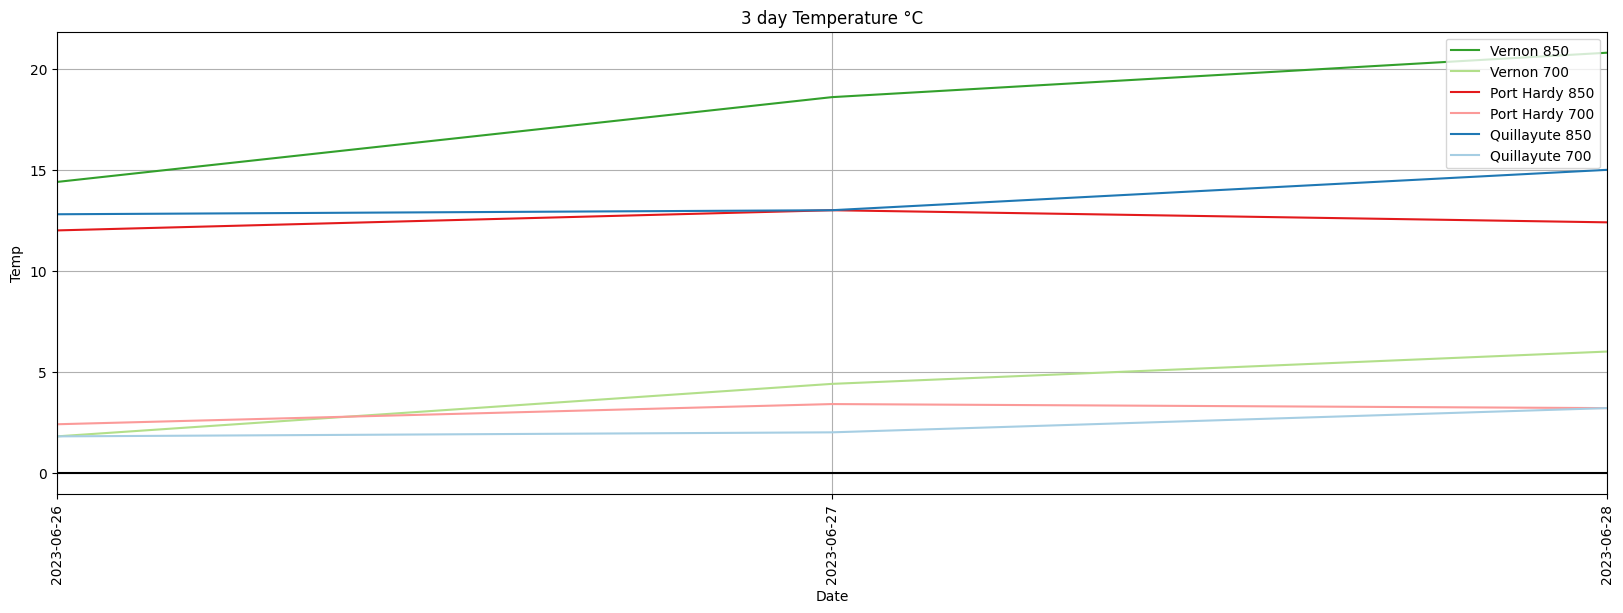

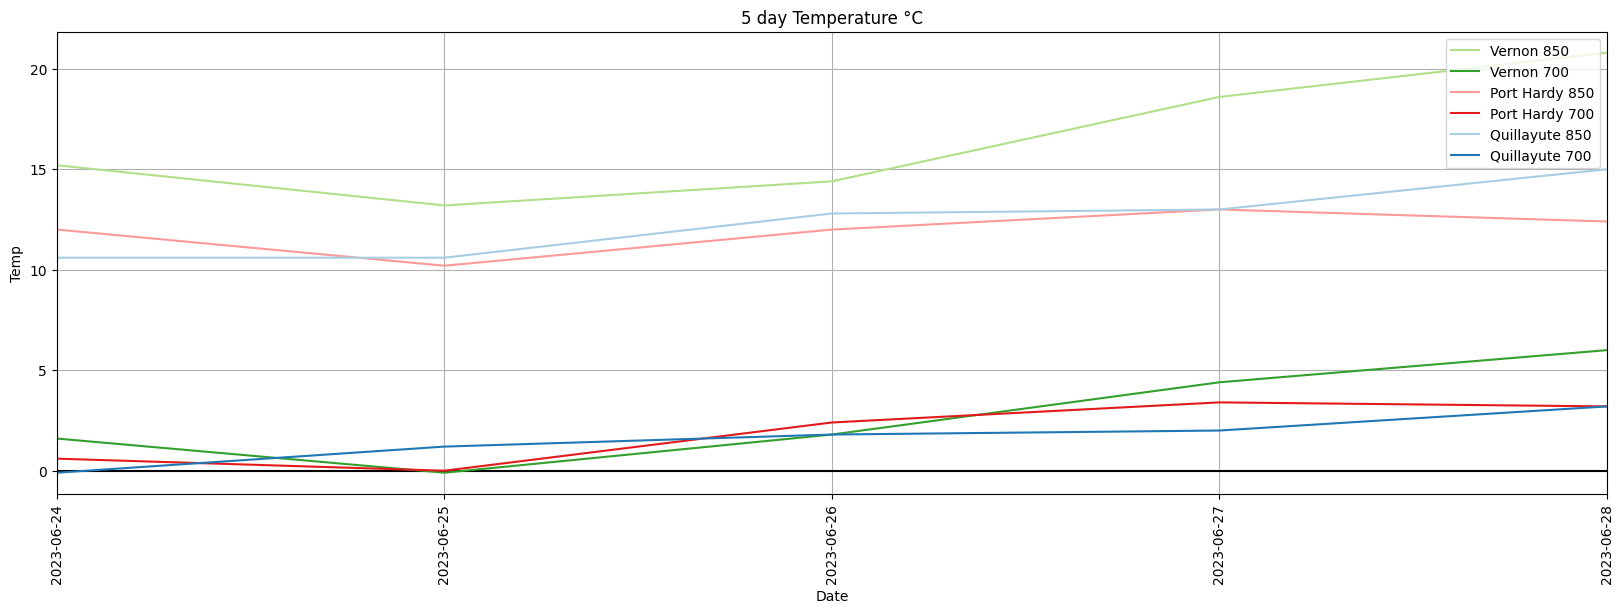

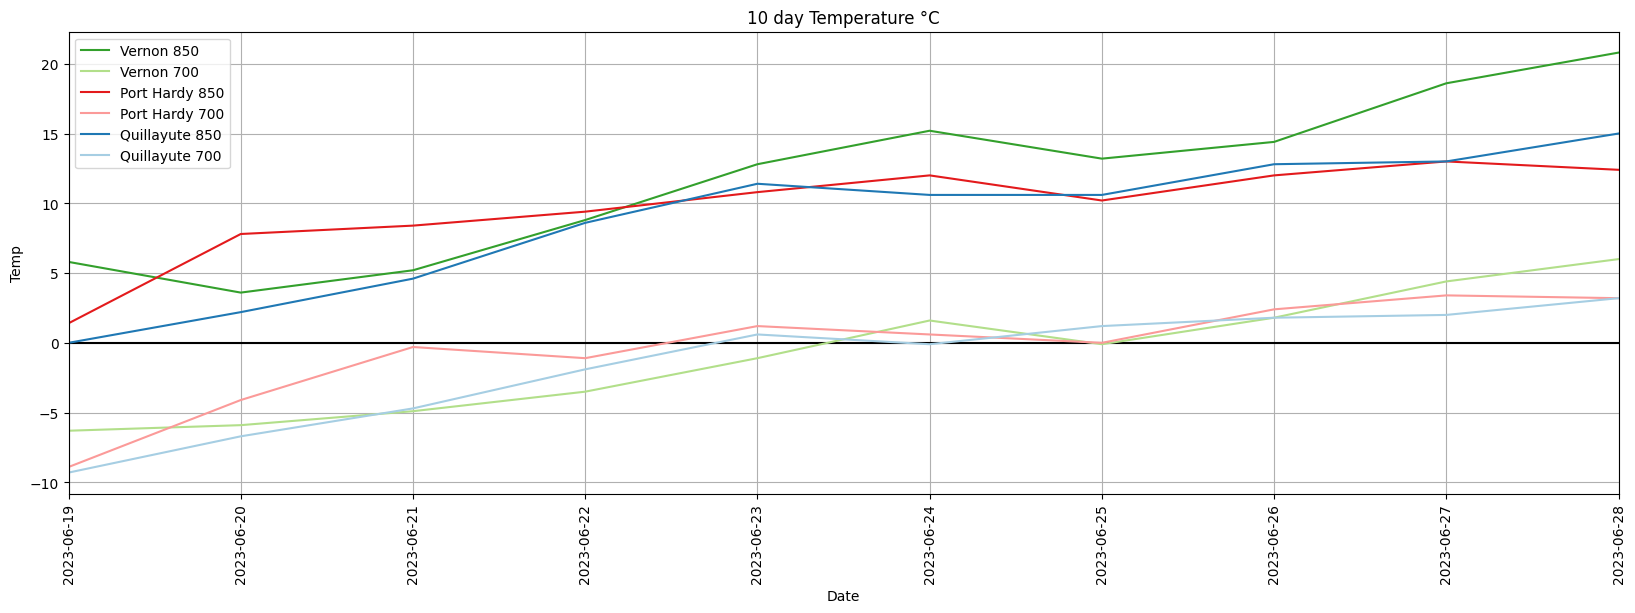

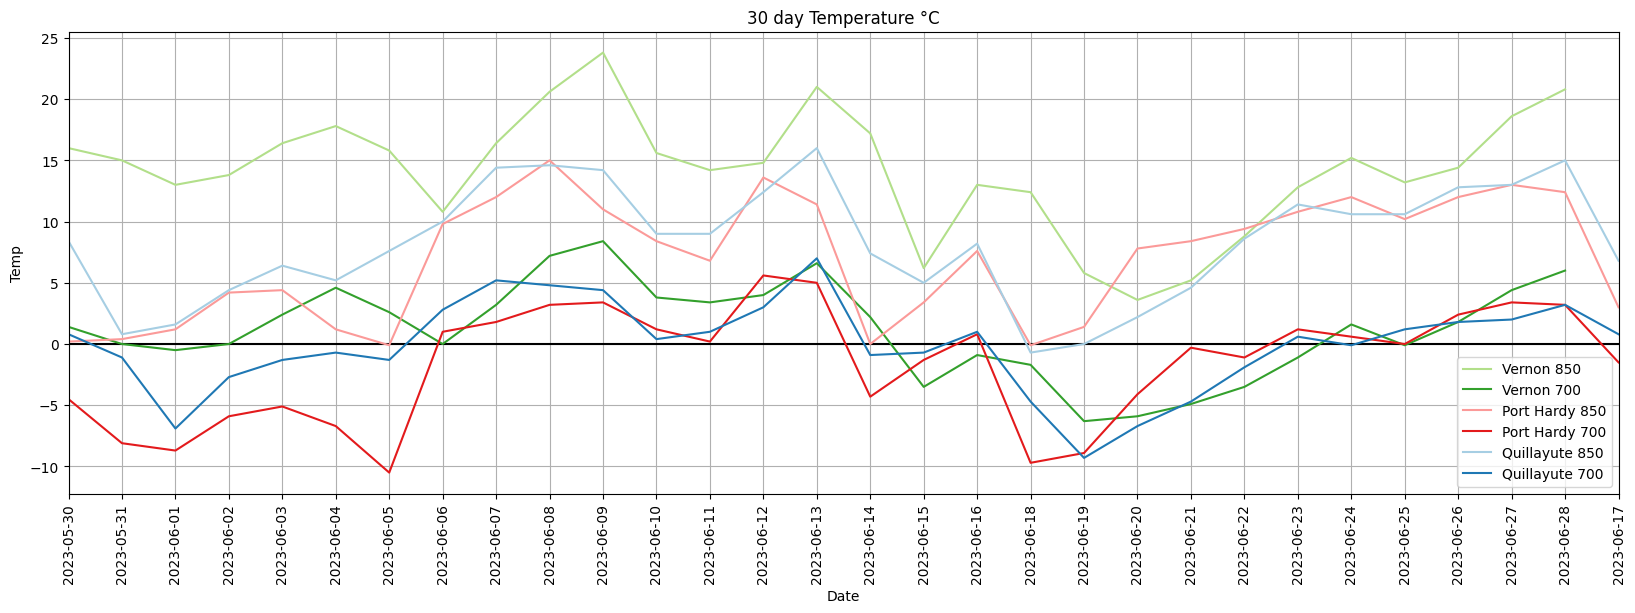

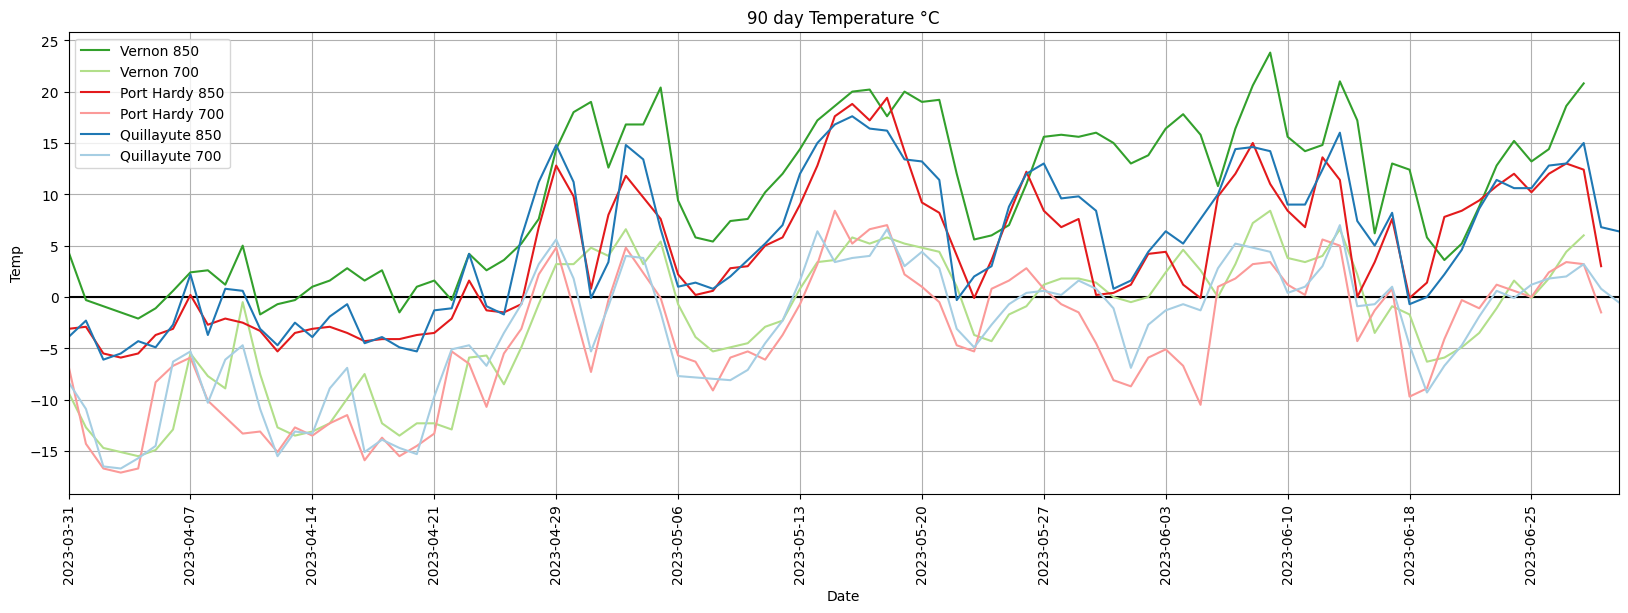

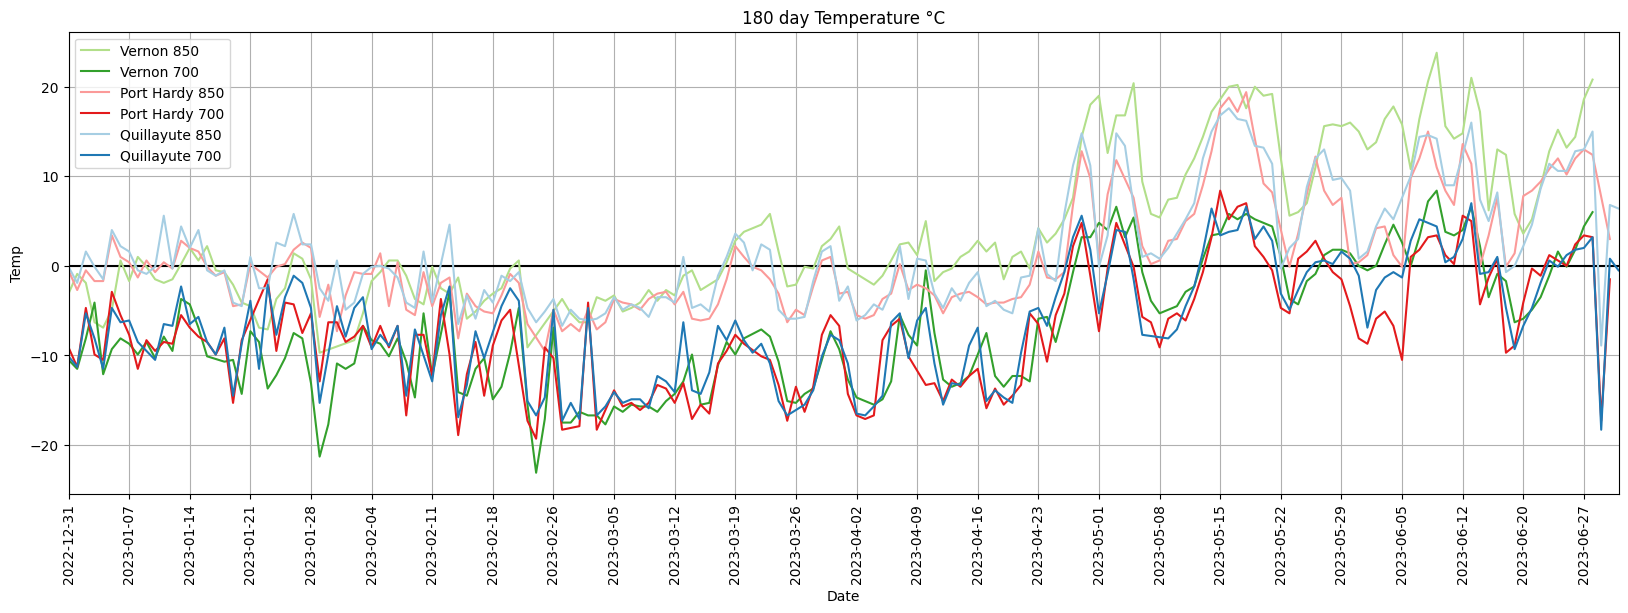

In [343]:
# Plot all temps on single graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plot_temps(plots, date, days, 'all')


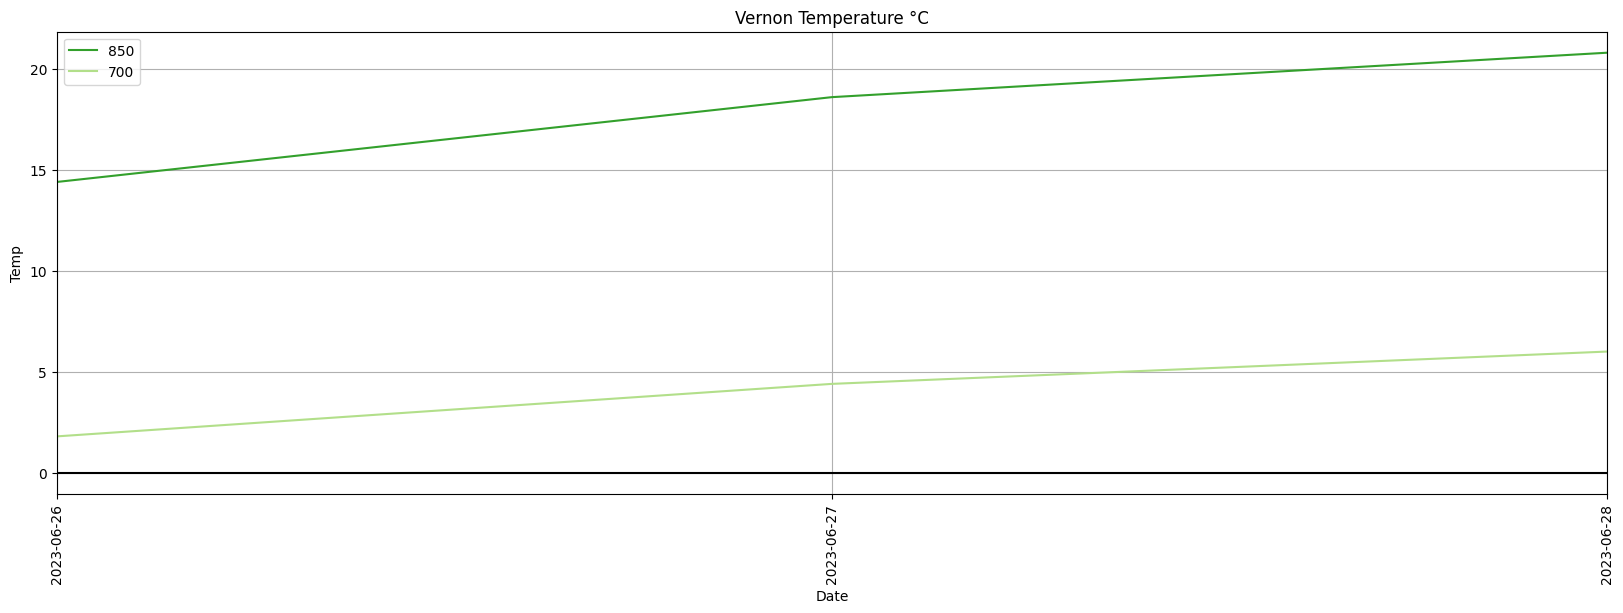

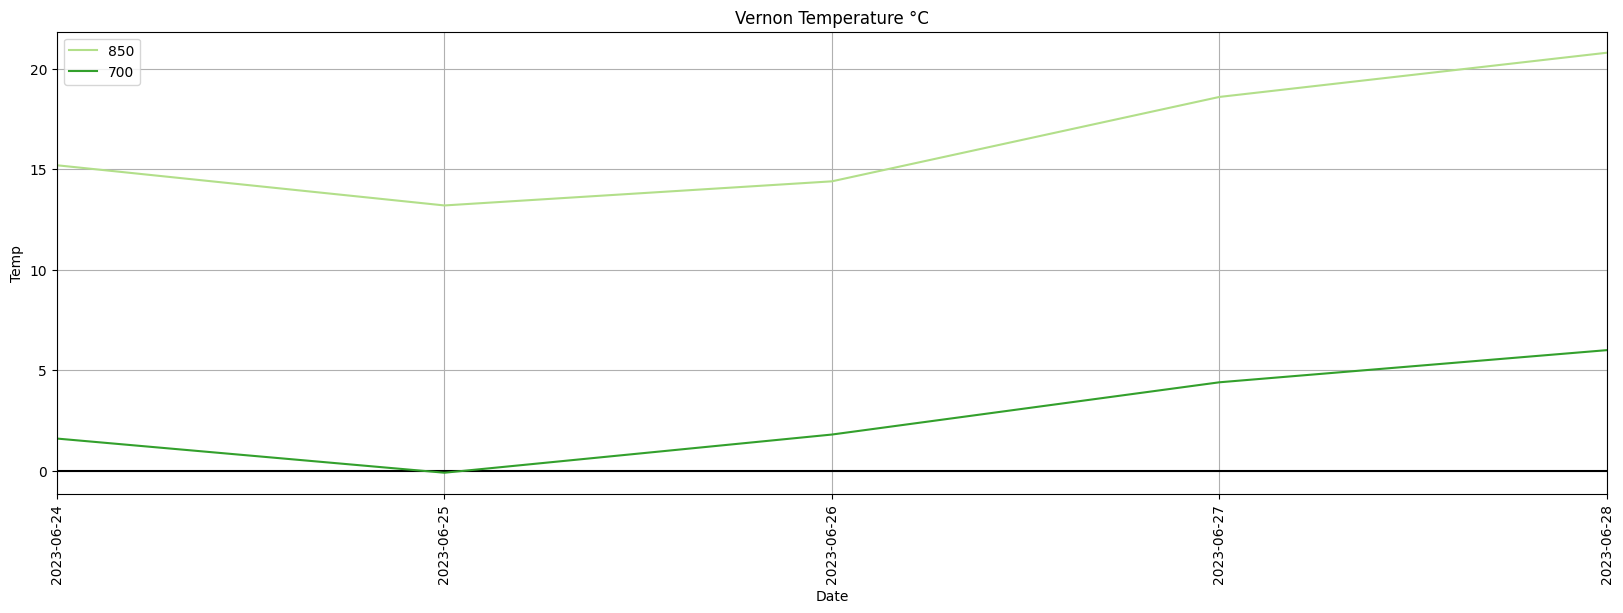

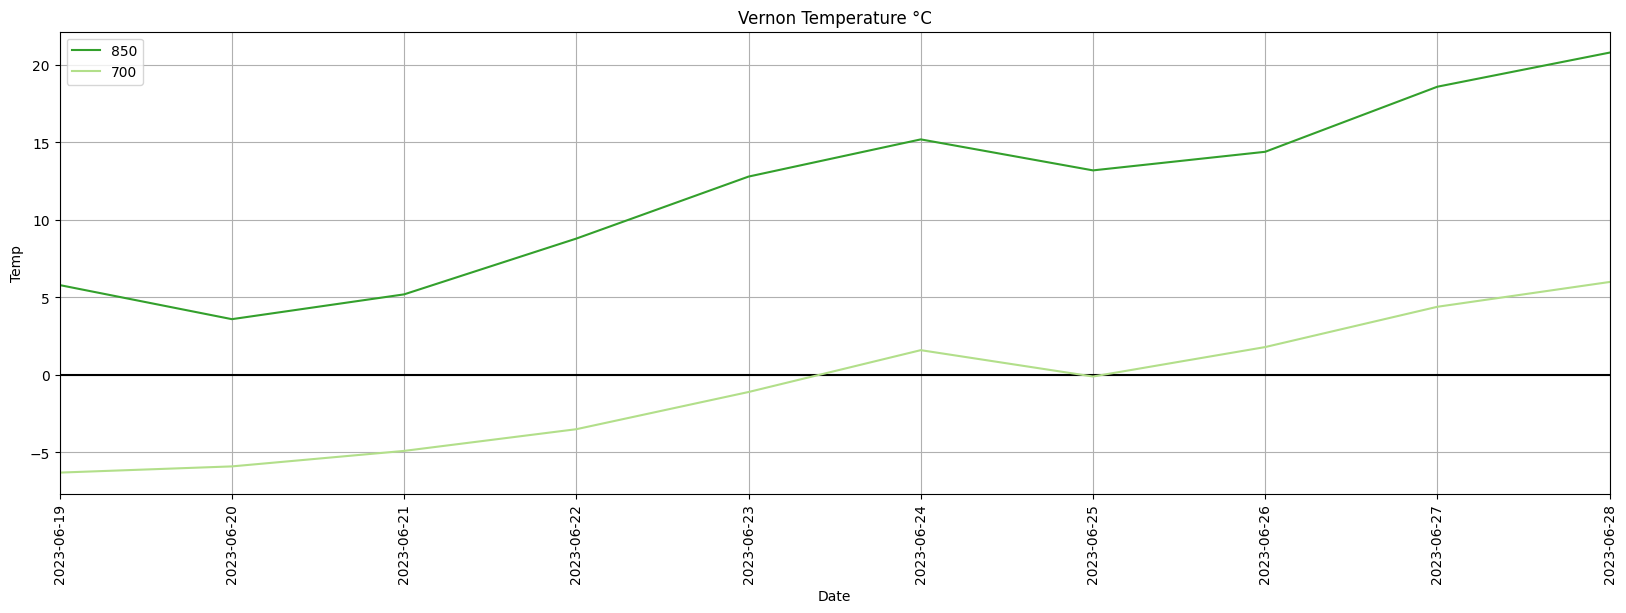

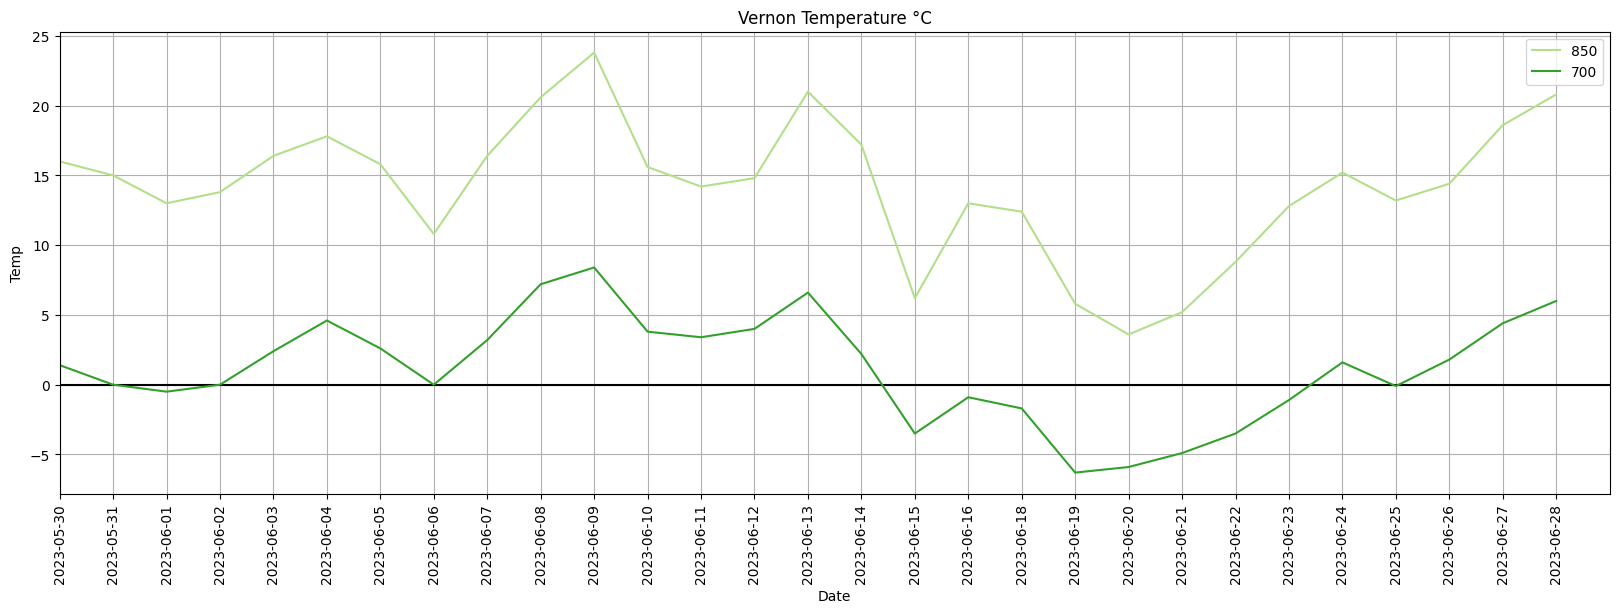

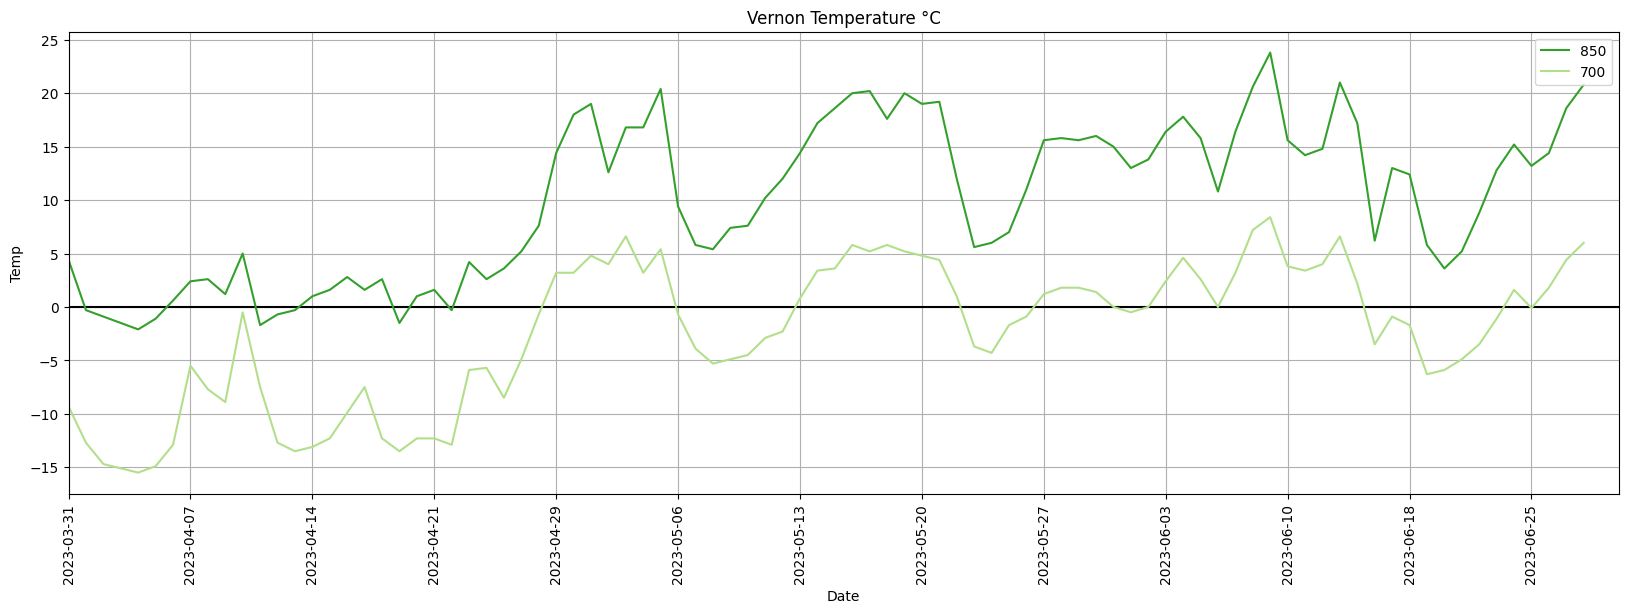

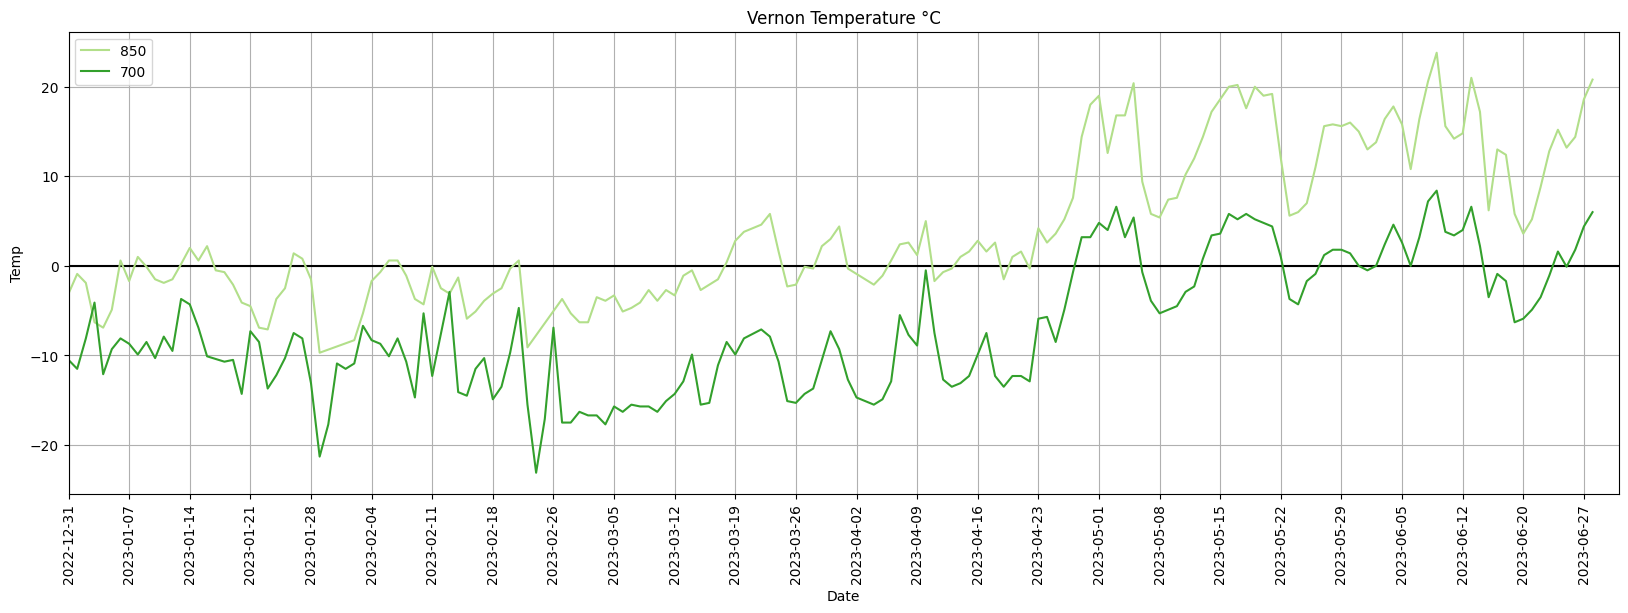

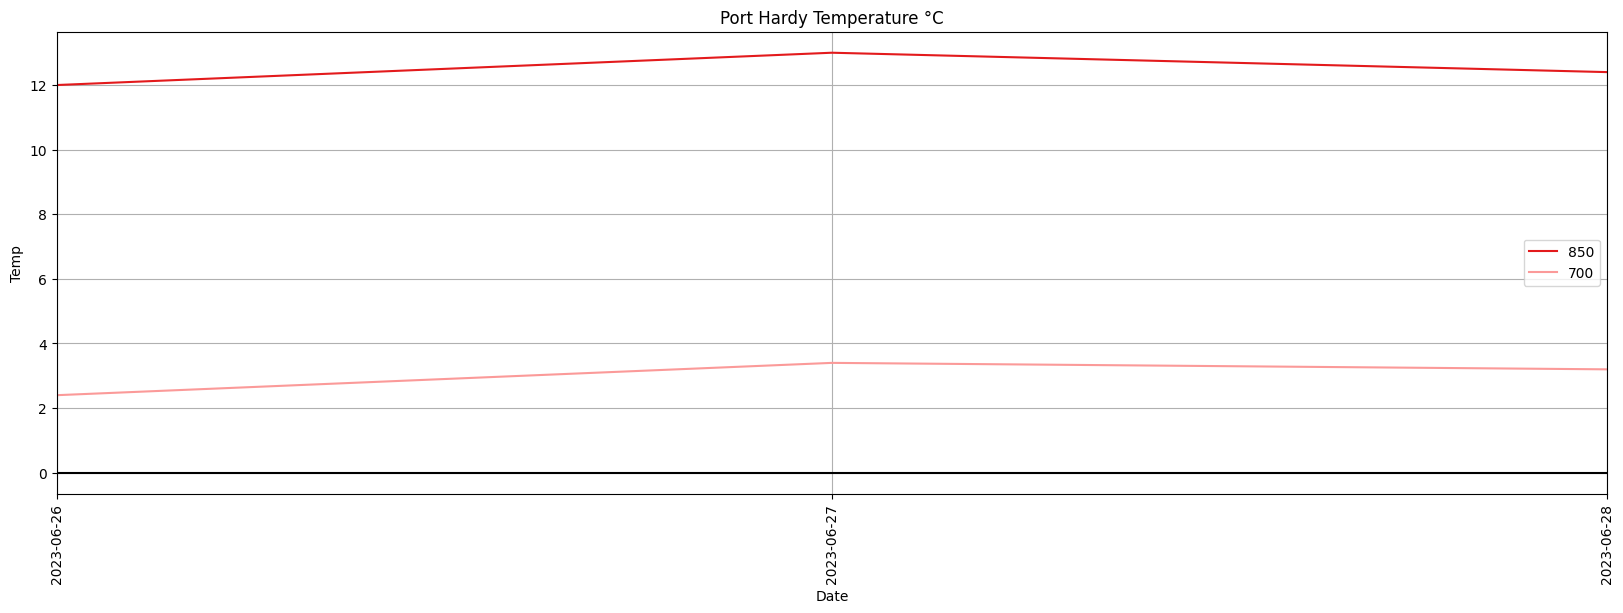

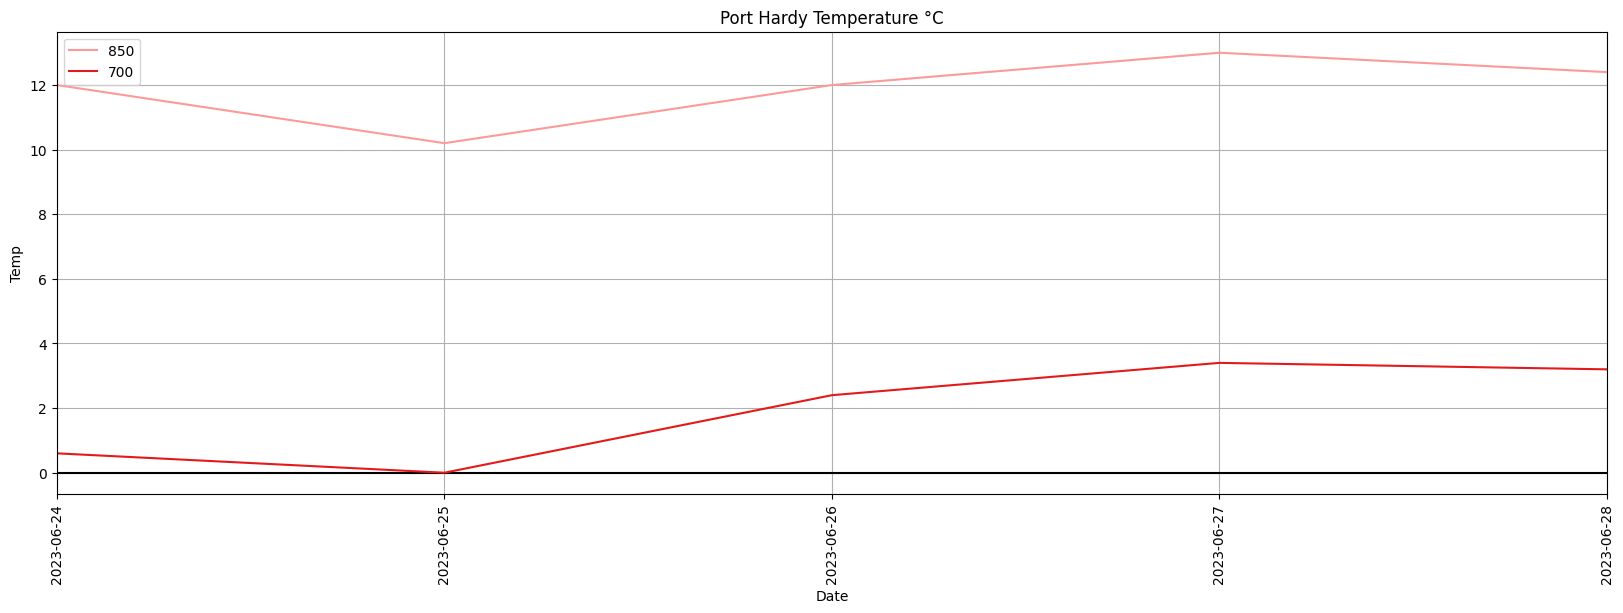

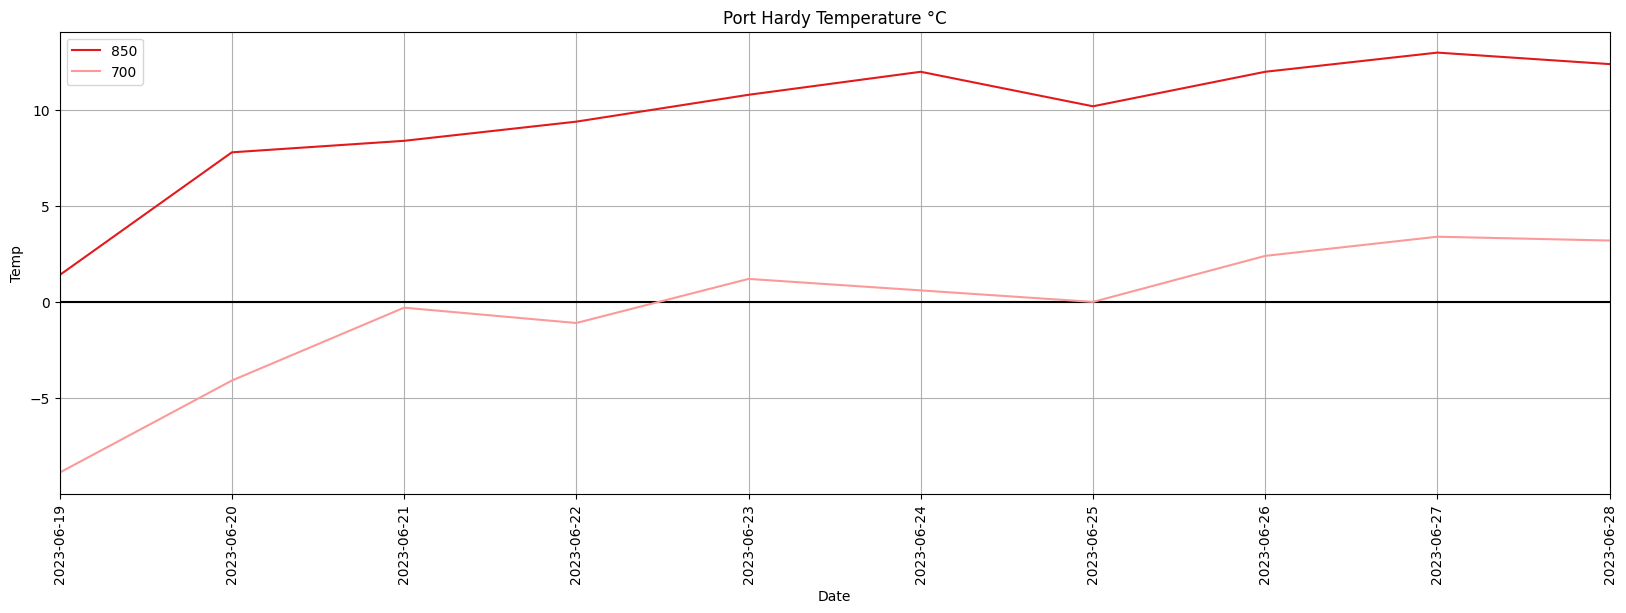

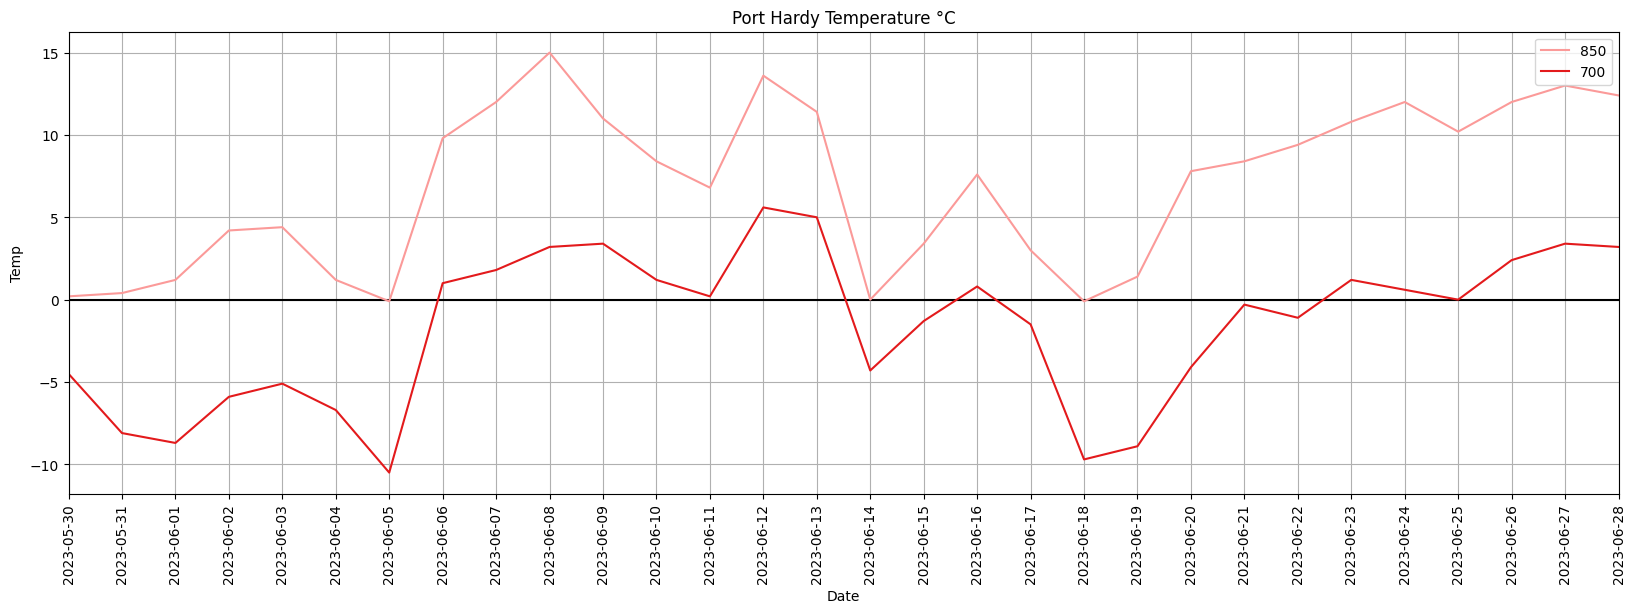

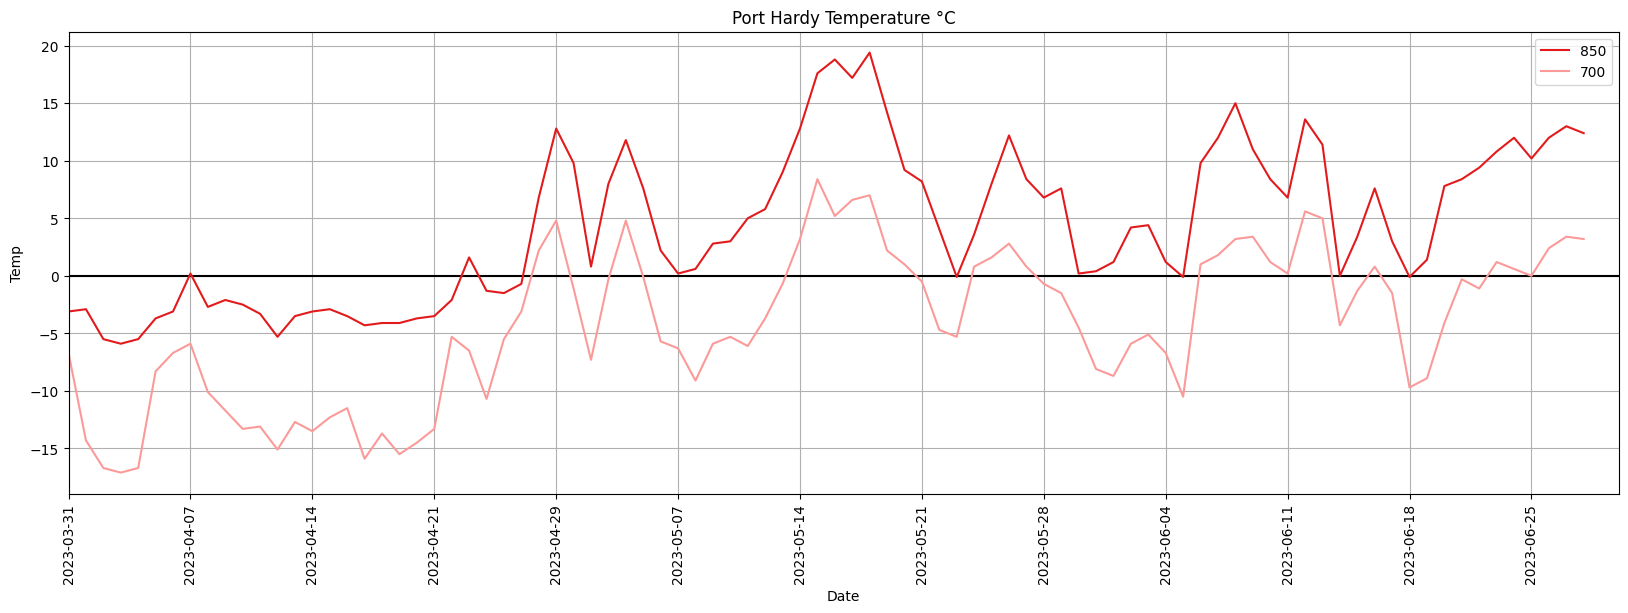

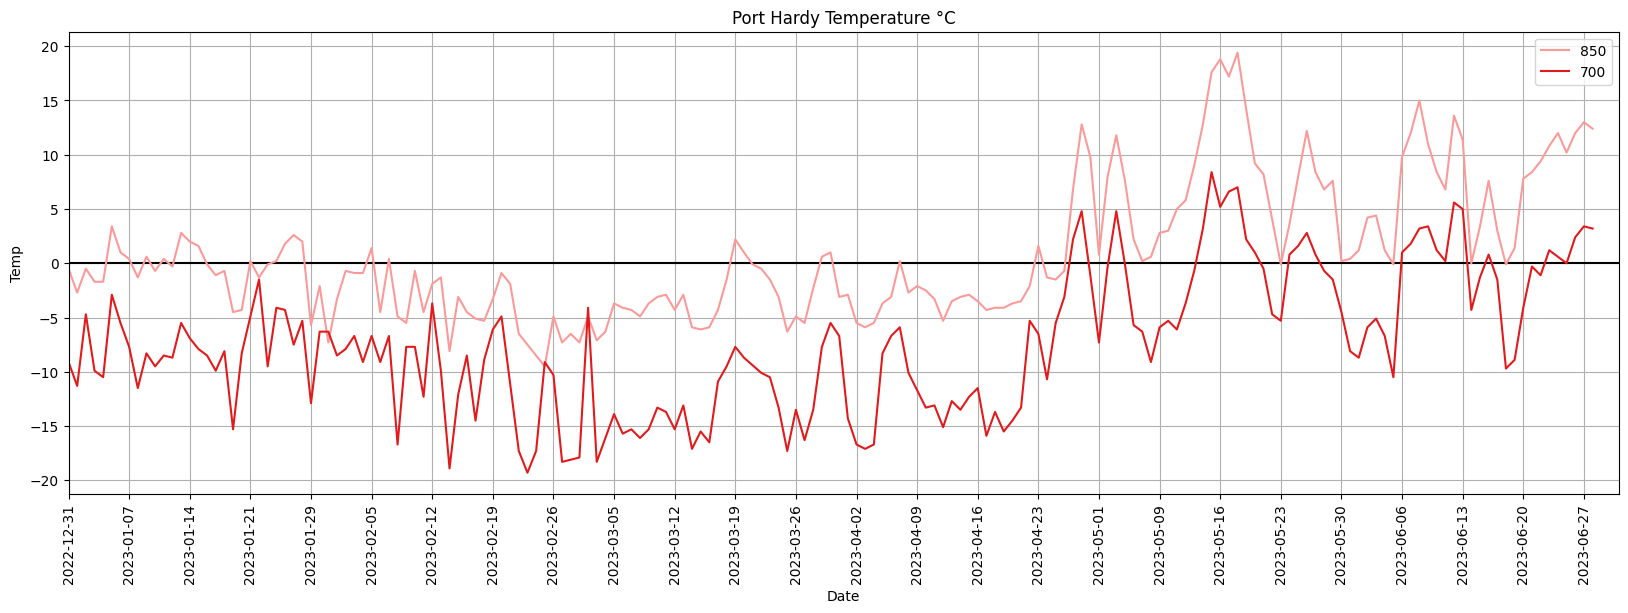

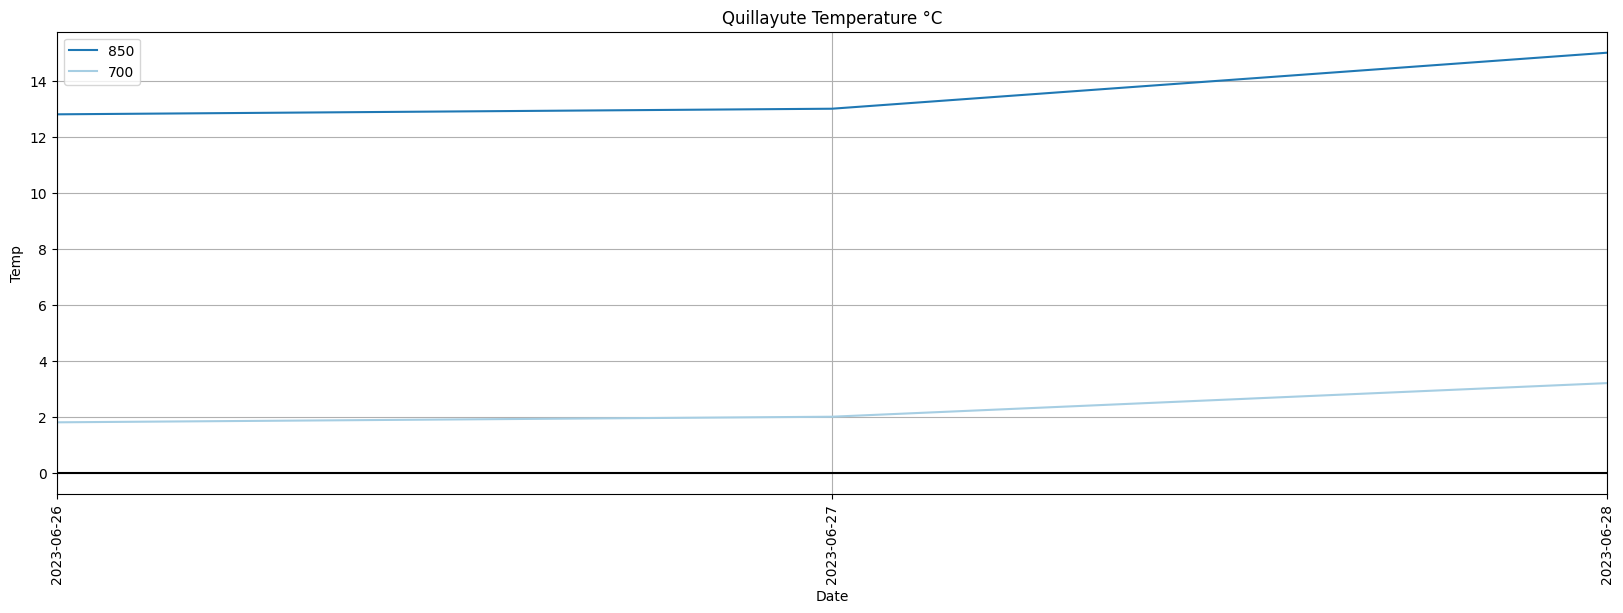

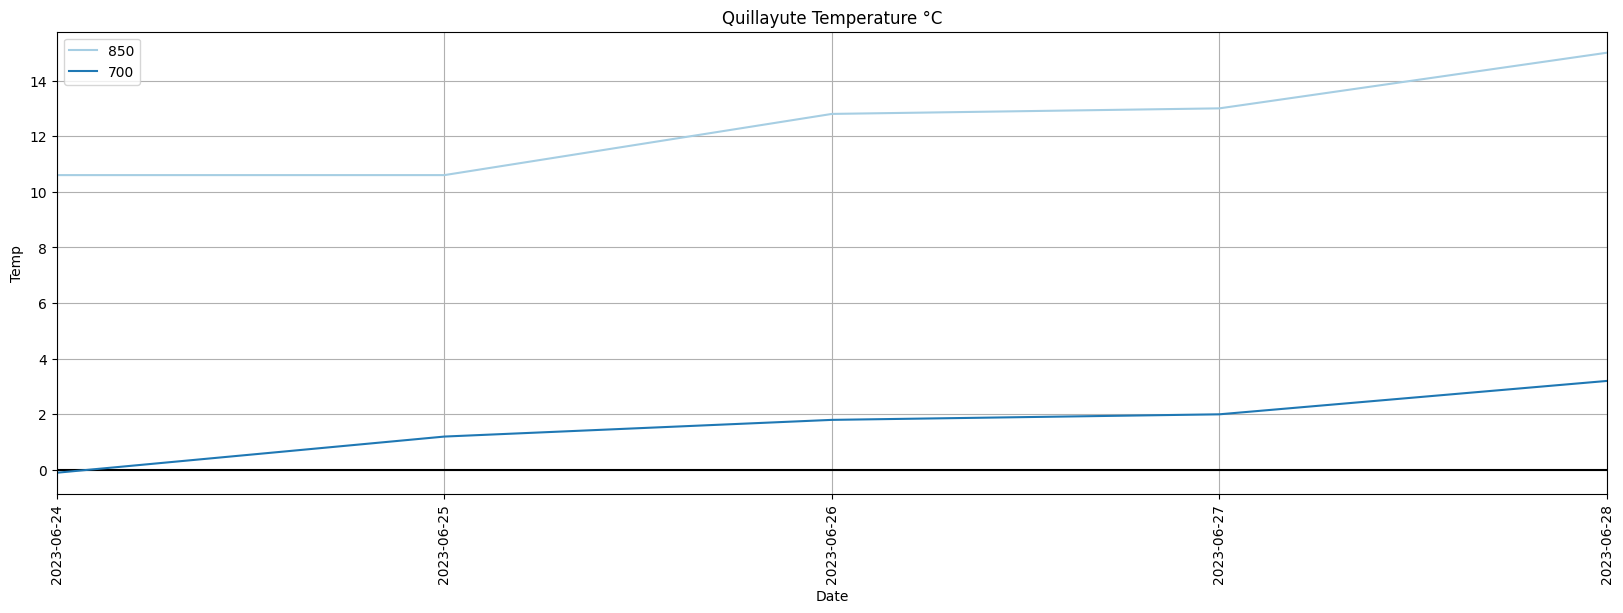

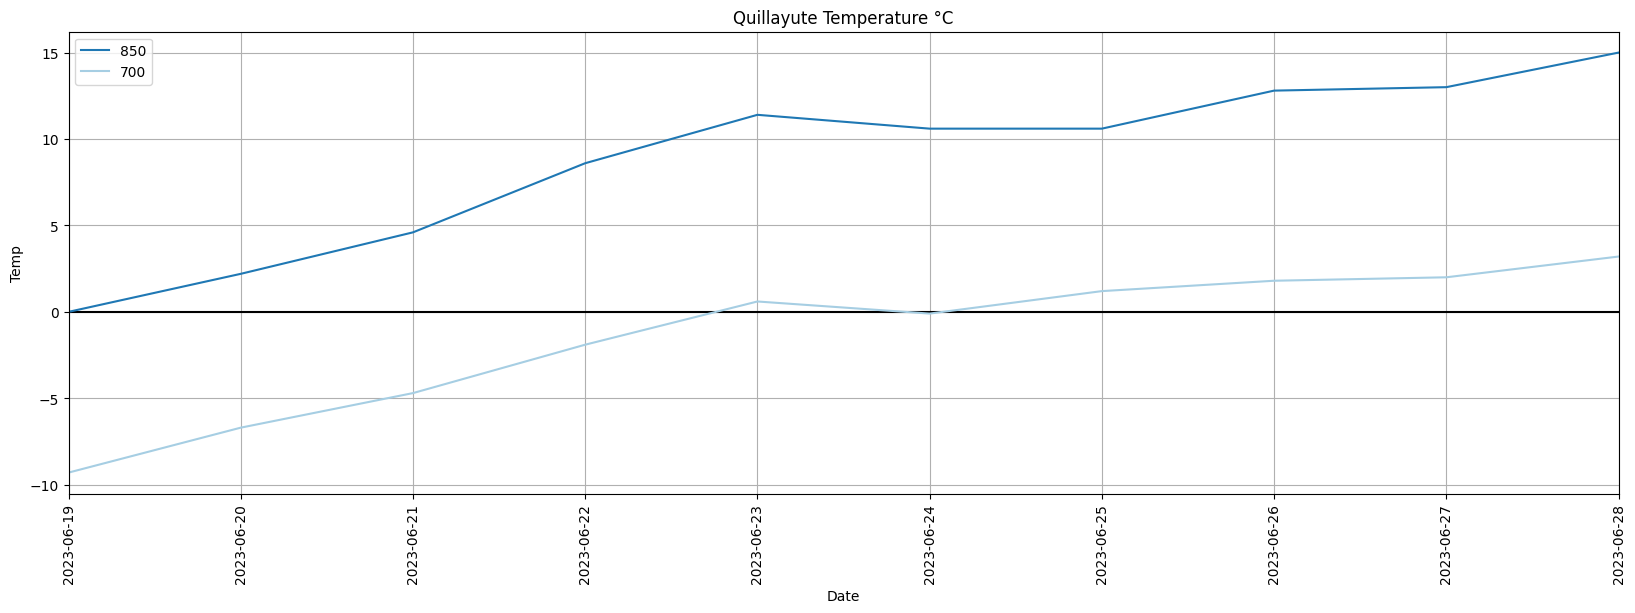

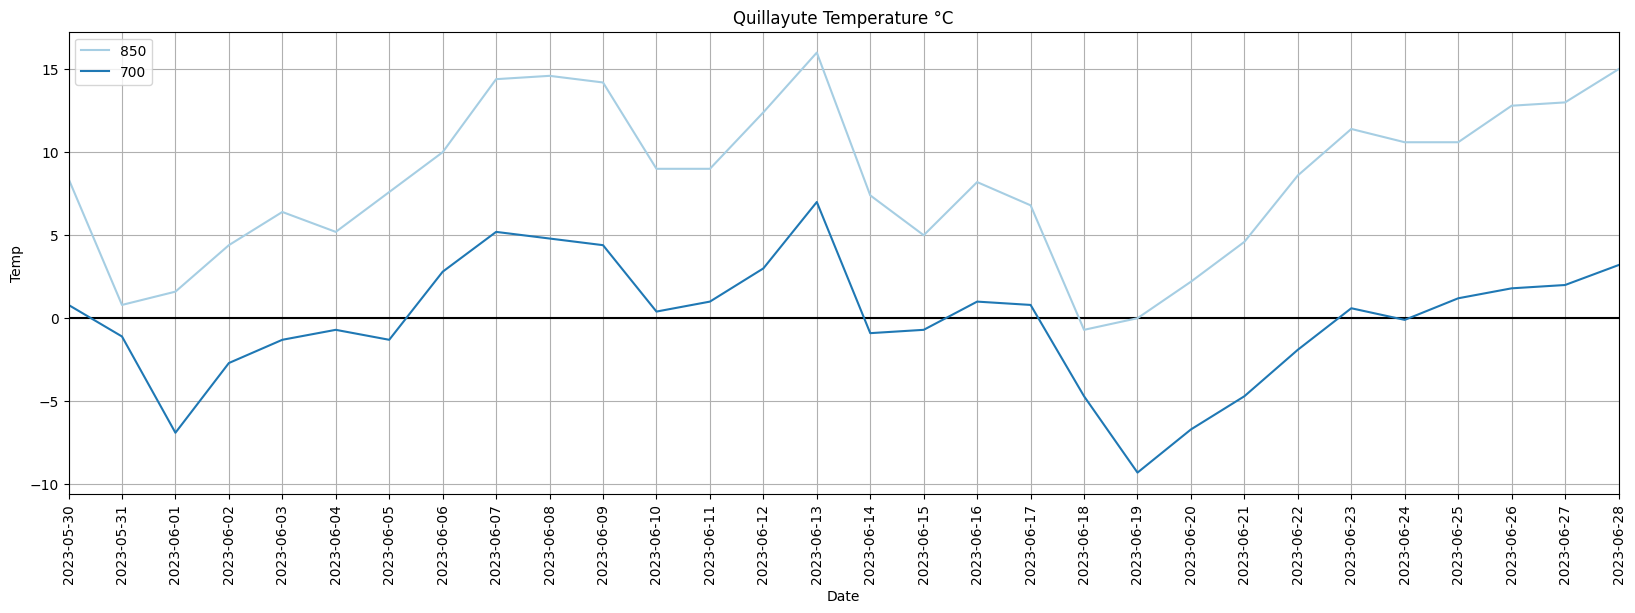

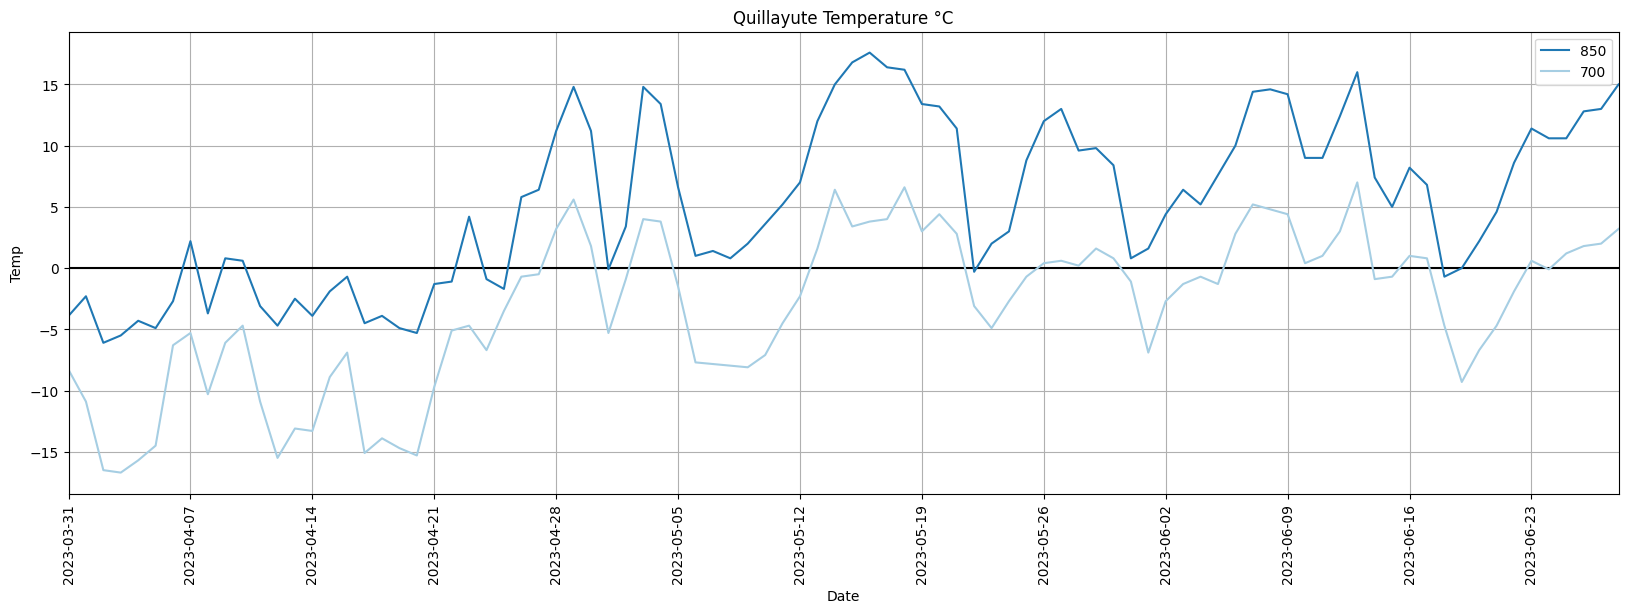

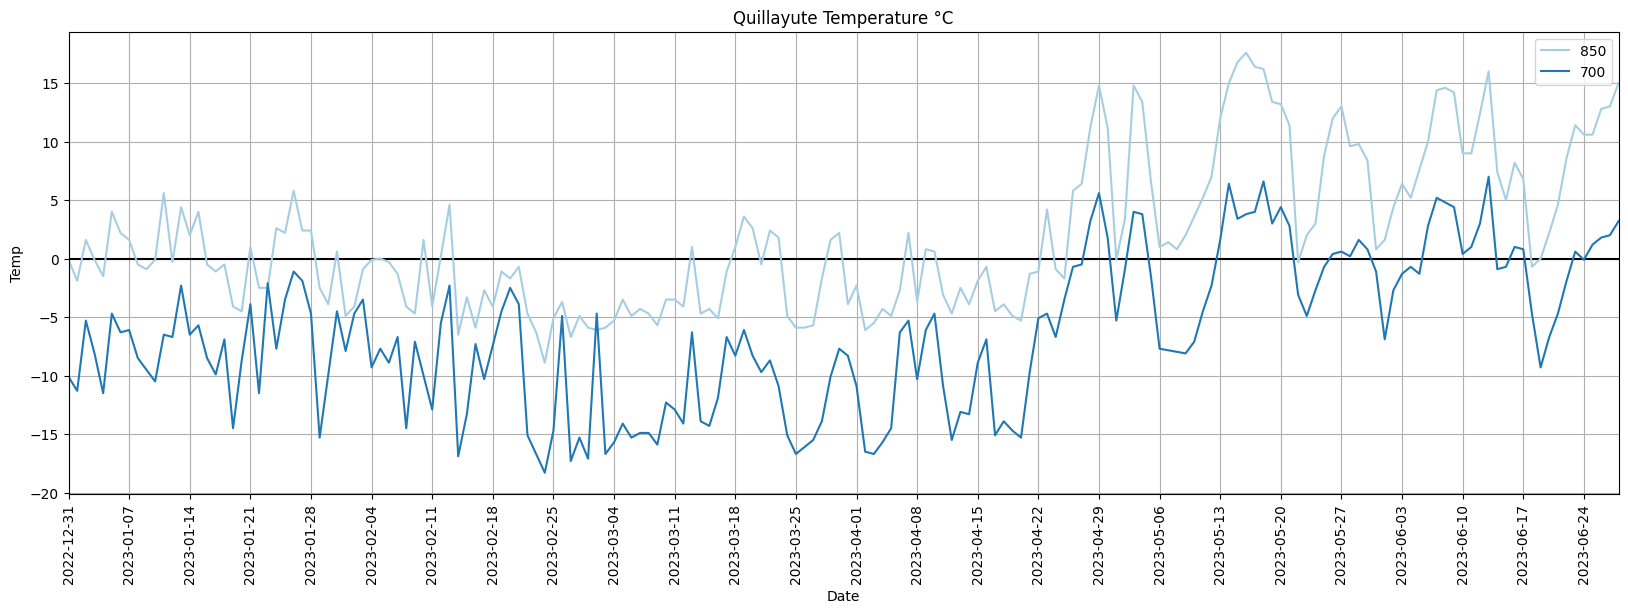

In [344]:
# Plot each temp on individual graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for plot in plots:
    plot_temps([plot], date, days)

In [ ]:
# Plot all wind on single graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plot_wind(plots, date, days, 'all')

# Plot each wind on individual graph
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for plot in plots:
    plot_wind(plot, days)

In [ ]:
start_date = date(2020, 1, 1)
end_date = datetime.today().date()

# Create list of all dates between start_date and today
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def date_range(start, delta):
    dates = []
    delta = timedelta(days=1)
    
    while start <= end:
        # add current date to list by converting  it to iso format
        dates.append(start.isoformat())
        # increment start date by timedelta
        start += delta
        
    return dates